In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
df = pd.read_excel('Updated File.xlsx', sheet_name = '2015-2017')

In [2]:
df.shape

(51, 26)

In [3]:
df.describe()

,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,...,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.033752e+06,1.076730e+06,38918.725490,5.030652e+05,4.917684e+05,5.136142e+05,2.808147e+05,406.058824,214.431373,63679.823529,...,34610.352941,1.893684e+05,-3318.705882,0.119949,-1.030921,0.553419,-1.027528,0.336684,-1.029225,-0.346270
std,2.164968e+06,2.007327e+06,128810.641473,1.307172e+06,8.842911e+05,9.517370e+05,6.291598e+05,462.569710,201.029675,137799.461755,...,107629.249630,4.568933e+05,16800.555480,1.752409,2.041296,1.978047,2.176205,1.468115,1.900419,1.456485
min,-4.164020e+05,-3.812810e+05,-189902.000000,-4.260520e+05,-5.287200e+04,-2.185330e+05,-9.115900e+04,-1816.000000,-536.000000,-30556.000000,...,-109587.000000,-1.447980e+05,-68581.000000,-4.265094,-5.872139,-2.748558,-5.754970,-3.063703,-5.813555,-4.438629
25%,1.482405e+05,1.651930e+05,-2693.000000,5.573550e+04,8.560100e+04,7.855450e+04,3.713450e+04,229.000000,131.500000,10323.000000,...,1352.500000,-1.052900e+04,-6464.000000,-1.138205,-2.549981,-0.759795,-2.484529,-0.661064,-2.339056,-1.482906
50%,4.256150e+05,4.598370e+05,15220.000000,1.790710e+05,1.776710e+05,2.289000e+05,1.265880e+05,373.000000,212.000000,23191.000000,...,11070.000000,4.618700e+04,-481.000000,0.133654,-0.868559,0.275862,-0.983902,0.240088,-0.999665,-0.143454
75%,9.274400e+05,9.233910e+05,37852.000000,3.442920e+05,4.540205e+05,5.069145e+05,2.420365e+05,562.500000,309.000000,57284.000000,...,26887.500000,2.255135e+05,1506.500000,1.505596,0.494253,1.703987,0.865751,1.258040,0.264230,0.707257
max,1.371425e+07,1.166275e+07,813113.000000,8.686036e+06,4.695033e+06,5.796147e+06,4.070564e+06,1795.000000,700.000000,931123.000000,...,656968.000000,2.938326e+06,50767.000000,3.796597,3.703375,4.368536,3.455644,3.492146,2.963828,2.938498


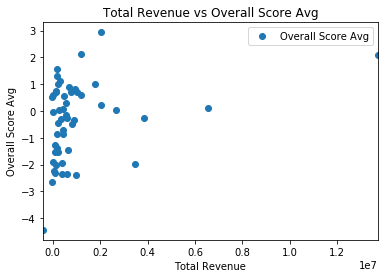

In [4]:
df.plot(x='Total Revenue', y='Overall Score Avg', style='o')
plt.title('Total Revenue vs Overall Score Avg')
plt.xlabel('Total Revenue')
plt.ylabel('Overall Score Avg')
plt.show()

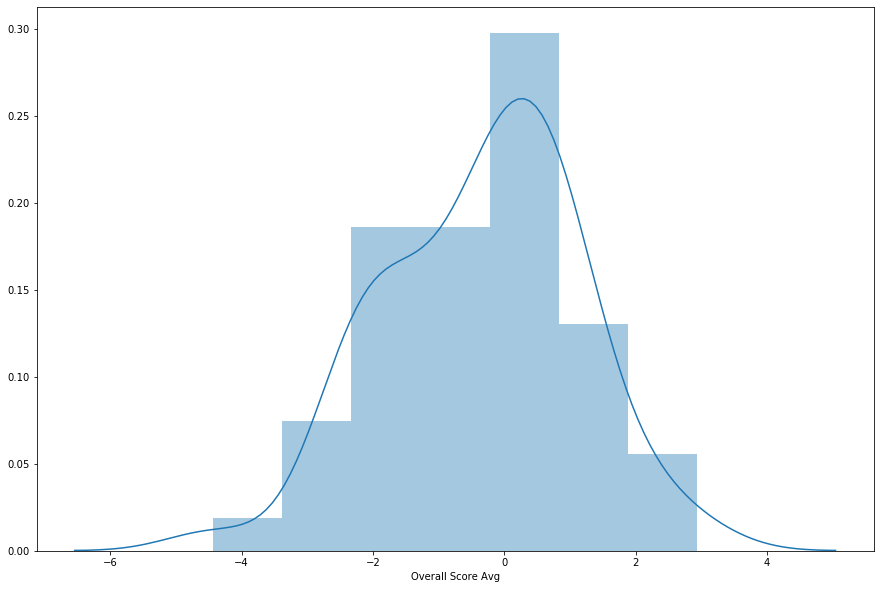

In [5]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Overall Score Avg'])

In [6]:
X = df['Total Revenue'].values.reshape(-1,1)
y = df['Overall Score Avg'].values.reshape(-1,1)
df[['Overall Score Avg']]=df[['Overall Score Avg']]/df[['Overall Score Avg']].max()
df.describe()

,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,...,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.033752e+06,1.076730e+06,38918.725490,5.030652e+05,4.917684e+05,5.136142e+05,2.808147e+05,406.058824,214.431373,63679.823529,...,34610.352941,1.893684e+05,-3318.705882,0.119949,-1.030921,0.553419,-1.027528,0.336684,-1.029225,-0.117839
std,2.164968e+06,2.007327e+06,128810.641473,1.307172e+06,8.842911e+05,9.517370e+05,6.291598e+05,462.569710,201.029675,137799.461755,...,107629.249630,4.568933e+05,16800.555480,1.752409,2.041296,1.978047,2.176205,1.468115,1.900419,0.495656
min,-4.164020e+05,-3.812810e+05,-189902.000000,-4.260520e+05,-5.287200e+04,-2.185330e+05,-9.115900e+04,-1816.000000,-536.000000,-30556.000000,...,-109587.000000,-1.447980e+05,-68581.000000,-4.265094,-5.872139,-2.748558,-5.754970,-3.063703,-5.813555,-1.510509
25%,1.482405e+05,1.651930e+05,-2693.000000,5.573550e+04,8.560100e+04,7.855450e+04,3.713450e+04,229.000000,131.500000,10323.000000,...,1352.500000,-1.052900e+04,-6464.000000,-1.138205,-2.549981,-0.759795,-2.484529,-0.661064,-2.339056,-0.504648
50%,4.256150e+05,4.598370e+05,15220.000000,1.790710e+05,1.776710e+05,2.289000e+05,1.265880e+05,373.000000,212.000000,23191.000000,...,11070.000000,4.618700e+04,-481.000000,0.133654,-0.868559,0.275862,-0.983902,0.240088,-0.999665,-0.048819
75%,9.274400e+05,9.233910e+05,37852.000000,3.442920e+05,4.540205e+05,5.069145e+05,2.420365e+05,562.500000,309.000000,57284.000000,...,26887.500000,2.255135e+05,1506.500000,1.505596,0.494253,1.703987,0.865751,1.258040,0.264230,0.240687
max,1.371425e+07,1.166275e+07,813113.000000,8.686036e+06,4.695033e+06,5.796147e+06,4.070564e+06,1795.000000,700.000000,931123.000000,...,656968.000000,2.938326e+06,50767.000000,3.796597,3.703375,4.368536,3.455644,3.492146,2.963828,1.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[-0.19001841]
[[9.41650993e-08]]


In [11]:
y_pred = regressor.predict(X_test)


In [12]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,-0.682581,-0.177553
1,0.246109,-0.176790
2,0.339122,-0.021205
3,0.304762,-0.124580
4,-0.298165,-0.148368
5,-0.097254,-0.159244
6,-0.791337,-0.182846
7,0.042364,0.428513
8,-0.647287,-0.187559
9,0.706558,1.101385


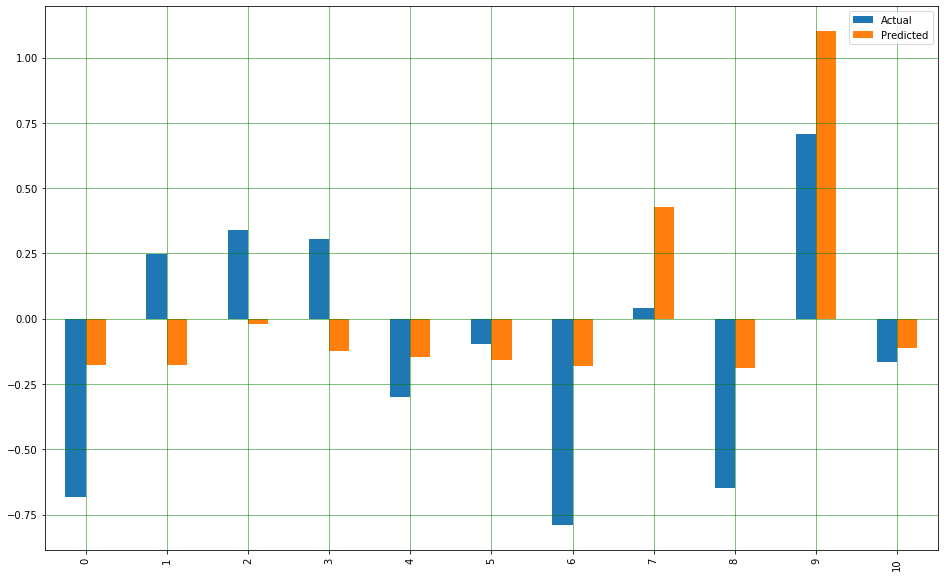

In [13]:
df3 = df2.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

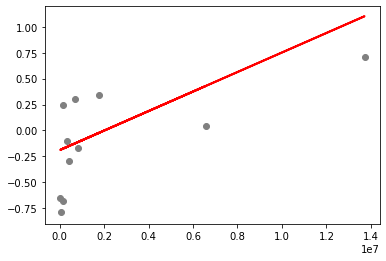

In [14]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
#After Normalization
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.34840818524714134
Mean Squared Error: 0.15126056609872135
Root Mean Squared Error: 0.38892231370637675


In [14]:
#Before Normalization
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0237968161922113
Mean Squared Error: 1.306100428130732
Root Mean Squared Error: 1.1428475086951593


In [11]:
#Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1.4450553187606292
0.02964553350805832
1.142847508695159
0.2789165656643442


In [12]:
#Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1.4450553187606292
0.02964553350805821
1.1428474911180215
0.2789165878450509
